# COURSE: PCA and multivariate neural signal processing
## SECTION: Creating and interpreting covariance matrices
### VIDEO: Python: Using real and simulated data
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
from pytopo import topoplotIndie

In [3]:
# load data
matfile = sio.loadmat('MATLAB_data_files/sampleEEGdata')
EEG = matfile['EEG'][0,0]

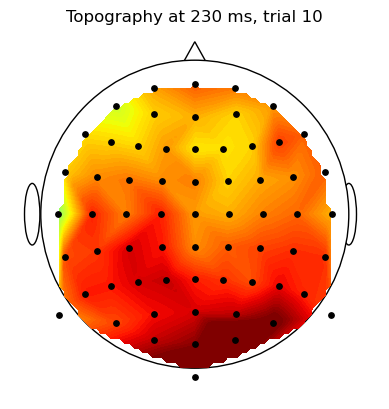

In [4]:
## creating topographical maps

# parameters to select data
timeidx  = np.argmin(np.abs(EEG['times']-230))
trialidx = 10

# grab one time slice
data = EEG['data'][:,timeidx,trialidx]

# visualize
title = f"Topography at {EEG['times'][0][timeidx]:.0f} ms, trial {trialidx}"
topoplotIndie( data, EEG['chanlocs'] ,title)


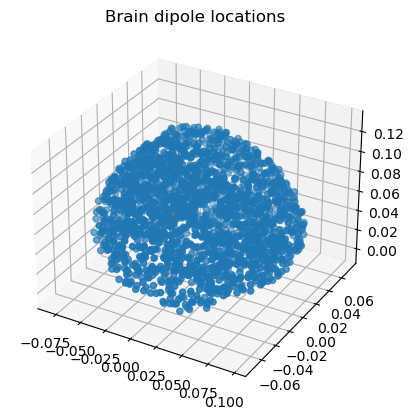

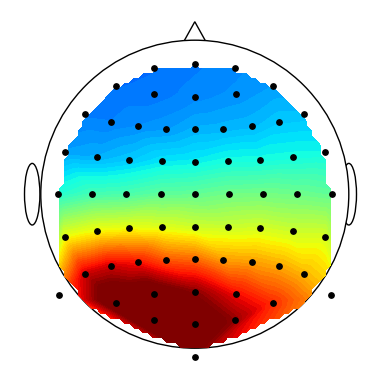

In [34]:
## simulate data

# mat file containing EEG, leadfield and channel locations
matfile = sio.loadmat('MATLAB_data_files/emptyEEG')
EEG = matfile['EEG'][0,0]
lf  = matfile['lf'][0,0]

# get chanloc XY values
x,y = [],[]
for i in range(int(EEG['nbchan'])):
    x.append(EEG['chanlocs'][0][i]['X'][0][0])
    y.append(EEG['chanlocs'][0][i]['Y'][0][0])


# index of dipole to simulate activity in
diploc =385

# setup figure
fig = plt.figure()
#ax  = Axes3D(fig)

#fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.axes(None, projection='3d')
# plot brain dipoles
ax.scatter(lf['GridLoc'][:,0], lf['GridLoc'][:,1], lf['GridLoc'][:,2], 'bo')
ax.scatter(lf['GridLoc'][diploc,0], lf['GridLoc'][diploc,1], lf['GridLoc'][diploc,2], marker='o',s=100)
plt.title('Brain dipole locations')
plt.show()


# Each dipole can be projected onto the scalp using the forward model. 
# The code below shows this projection from one dipole.
topoplotIndie(-lf['Gain'][:,0,diploc],EEG['chanlocs'])


In [35]:
## create time series data

# number of time points and time vector
N = 1000
EEG['times'] = np.arange(N)/EEG['srate'][0]


# Random data in all brain dipoles
dipole_data = np.random.randn(lf['Gain'].shape[2],N)

# add signal to one dipole
dipole_data[diploc,:] = 15*np.sin(2*np.pi*10*EEG['times'])

# project data from all dipoles to scalp electrodes
EEG['data'] = lf['Gain'][:,0,:]@dipole_data

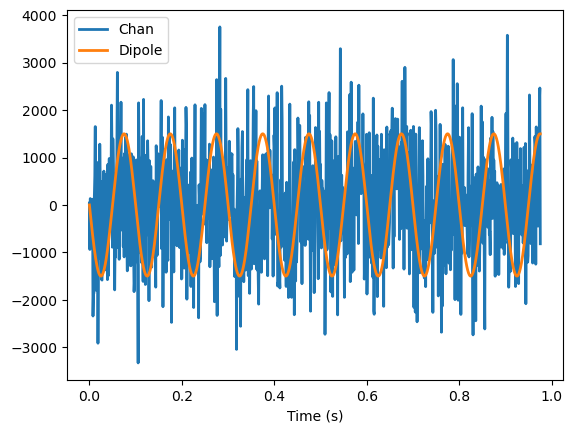

In [36]:
## plot the time series data

plt.plot(EEG['times'],EEG['data'][30,:],linewidth=2)
plt.plot(EEG['times'],-dipole_data[diploc,:]*100,linewidth=2)
plt.legend(['Chan','Dipole'])
plt.xlabel('Time (s)')
plt.show()